# Iris
- Q1.1 Implement a KNN classifier.
- Q1.2 Report precision, recall, f1 score and accuracy.
- Q1.3 Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.(10 points)

- Q2.1 Use different distance measures as applicable. 
- Q2.2 Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.datatools import train_test_split
from utils.metrics import precision, recall, f1_score, accuracy
from utils.distance_measures import *
from utils.plotter import *

from utils.knn import get_k_nearest_neighbours, best_class, classify_example, predict

## 2. Iris.csv

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path, header=None, sep=',')

    # add column names header
    df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]

    df.head(3)

    return df
    
df = read_csv("../data/iris/Iris.csv")

# Q1.1 Implement a KNN classifier.

In [3]:
number_of_neighbours = 7

train_df, validate_df = train_test_split(df, test_size = 0.2, random_state=1)

predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=euclidean_distance)

actual = validate_df["label"]

combined_df = pd.concat([actual, predictions],axis=1)



 # Q1.2 Report precision, recall, f1_score and accuracy

accuracy: 1.0
precision for Iris-setosa: 1.0
precision for Iris-versicolor: 1.0
precision for Iris-virginica: 1.0
recall for Iris-setosa: 1.0
recall for Iris-versicolor: 1.0
recall for Iris-virginica: 1.0


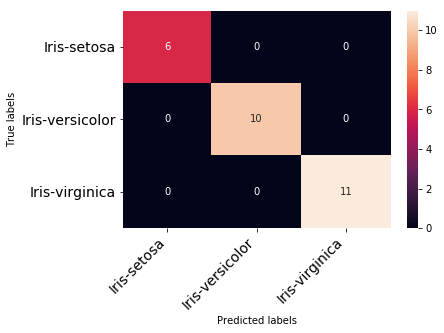

In [4]:
combined_df = pd.concat([actual, predictions], axis=1)

print("accuracy:", accuracy(combined_df))

print("precision for Iris-setosa:", precision(combined_df, 'Iris-setosa'))
print("precision for Iris-versicolor:", precision(combined_df, 'Iris-versicolor'))
print("precision for Iris-virginica:", precision(combined_df, 'Iris-virginica'))

print("recall for Iris-setosa:", recall(combined_df, 'Iris-setosa'))
print("recall for Iris-versicolor:", recall(combined_df, 'Iris-versicolor'))
print("recall for Iris-virginica:", recall(combined_df, 'Iris-virginica'))

plot_confusion_heatmap(combined_df, xticks_rotation=45)

# Q1.3 Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm

# Comparison with sklearn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split as sk_train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X = df.drop(["label"], axis=1)
# y = df["label"]
# X_train, X_test, y_train, y_test = sk_train_test_split(X, y, test_size=0.2, random_state=1)
X_train, y_train = train_df.drop(["label"], axis=1), train_df["label"]
X_test, y_test = validate_df.drop(["label"], axis=1), validate_df["label"]

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training set
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# Report accuracy
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



# Q2.1 Use different distance measures as applicable.

## Using euclidean distance

In [6]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=euclidean_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 1.0


## Using Manhattan distance

In [7]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=manhattan_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 1.0


## using Chebyshev distance

In [8]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=chebyshev_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 1.0


## Using Cosine distance

In [9]:
predictions = predict(validate_df, train_df, k=number_of_neighbours, distance_measure_algo=cosine_distance)
actual = validate_df["label"]
combined_df = pd.concat([actual, predictions],axis=1)

print("accuracy", accuracy(combined_df))


accuracy 1.0


### Plot for sklearn model

1 1.0;	2 0.9629629629629629;	3 1.0;	4 0.9629629629629629;	5 1.0;	6 0.9629629629629629;	7 1.0;	8 0.9629629629629629;	9 0.9629629629629629;	


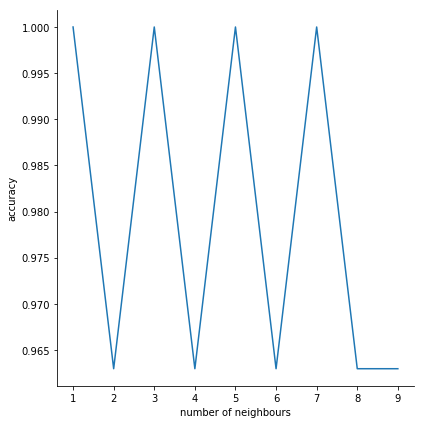

In [10]:
from math import sqrt, floor
accuracies = []
n_samples = floor(sqrt(len(train_df)))
X_train, y_train = train_df.drop(["label"], axis=1), train_df["label"]
X_test, y_test = validate_df.drop(["label"], axis=1), validate_df["label"]

for k in range(1, n_samples):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print(k, accu, end=";\t")
    accuracies.append((k, accu))

print()    
plotdf = pd.DataFrame(accuracies, index=range(n_samples - 1), columns=["number of neighbours", "accuracy"])
sns.relplot( y="accuracy", x="number of neighbours", kind="line", data=plotdf, height=6)


# Q2.2 Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

### Plot for our KNN implementation

1 ---> 1.0;	2 ---> 0.9629629629629629;	3 ---> 1.0;	4 ---> 0.9629629629629629;	5 ---> 1.0;	6 ---> 0.9629629629629629;	7 ---> 1.0;	8 ---> 0.9629629629629629;	9 ---> 0.9629629629629629;	


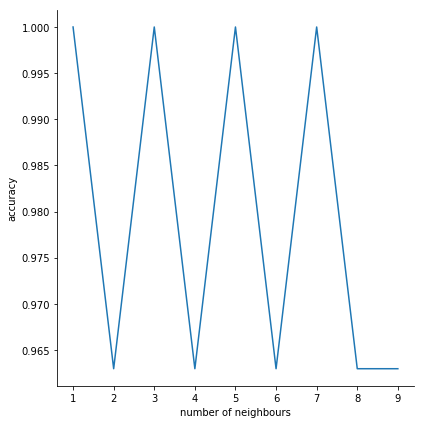

In [11]:
from math import sqrt, floor
accuracies = []
n_samples = floor(sqrt(len(train_df)))

for k in range(1, n_samples):
    predictions = predict(validate_df, train_df, k=k, distance_measure_algo=euclidean_distance)
    actual = validate_df["label"]
    combined_df = pd.concat([actual, predictions], axis=1)
    accu = accuracy(combined_df)
    print(k,"--->", accu, end=";\t")
    accuracies.append((k, accu))
print()    
plotdf = pd.DataFrame(accuracies, index=range(n_samples - 1), columns=["number of neighbours", "accuracy"])
sns.relplot( y="accuracy", x="number of neighbours", kind="line", data=plotdf, height=6)


# Load test data from supplied command line path

In [12]:
import sys
if len(sys.argv) != 2:
    print("Please supply test file path")
    exit(1)

test_file_path = sys.argv[1]
print("Loading test data from:", test_file_path)


Please supply test file path
Loading test data from: -f


accuracy: 0.9851851851851852
precision for Iris-setosa: 1.0
precision for Iris-versicolor: 0.9782608695652174
precision for Iris-virginica: 0.9777777777777777
recall for Iris-setosa: 1.0
recall for Iris-versicolor: 0.9782608695652174
recall for Iris-virginica: 0.9777777777777777


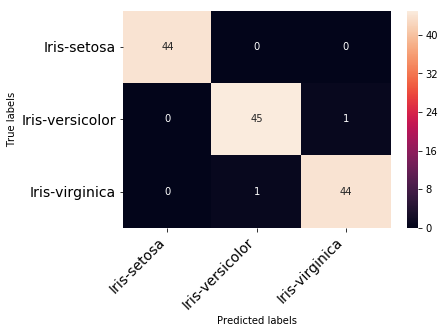

In [13]:
# STOPSHIP
if test_file_path == "-f":
    test_file_path = "../data/iris/Iris.csv"
    
test_df = read_csv(test_file_path)

predictions = predict(test_df, train_df, 5, cosine_distance)
actual = test_df["label"]
combined_df = pd.concat([actual, predictions], axis=1)

print("accuracy:", accuracy(combined_df))

print("precision for Iris-setosa:", precision(combined_df, 'Iris-setosa'))
print("precision for Iris-versicolor:", precision(combined_df, 'Iris-versicolor'))
print("precision for Iris-virginica:", precision(combined_df, 'Iris-virginica'))

print("recall for Iris-setosa:", recall(combined_df, 'Iris-setosa'))
print("recall for Iris-versicolor:", recall(combined_df, 'Iris-versicolor'))
print("recall for Iris-virginica:", recall(combined_df, 'Iris-virginica'))

plot_confusion_heatmap(combined_df, xticks_rotation=45)